In [2]:
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage


# create dataset  

In [4]:
show = ToPILImage()

ToPILImage()

In [21]:
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) #normalize
# trainset
trainset = tv.datasets.CIFAR10(
    root = './data/',
    train = True,
    download = True,
    transform = transform
)

Files already downloaded and verified


In [22]:
import torch 
trainloader = torch.utils.data.DataLoader(
    trainset, 
    batch_size = 4,
    shuffle=True,
    num_workers=2
)
# testset
testset = tv.datasets.CIFAR10(
    './data/',
    train = False,
    download = True,
    transform = transform
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size = 4,
    shuffle = False,
    num_workers = 2
)
# ??tv.datasets.CIFAR10

Files already downloaded and verified


In [23]:
classes = ('plane' , 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


car 1


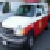

In [37]:
(data , label) = trainset[60]
print(classes[label],label)
show((data+1)/2).resize((50,50))

In [38]:
# dataiter = iter(trainloader)
# images, labels = dataiter.next()

# reconstruct NN

In [43]:
import torch.nn as nn
import torch.nn.functional as F

In [50]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(16*5*5, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)
#         forward funtion
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
net = Net()
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [45]:
from torch import optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters() , lr = 0.001 , momentum = 0.9)


In [51]:
torch.set_num_threads(8)
for epoch in range(2):
    
    running_loss = 0.0
    for i , data in enumerate(trainloader , 0):
        inputs , labels = data
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        
        optimizer.step()
        running_loss += loss.item()
        if i % 1000 == 999 :
            print( '[%d, %5d] loss: %.3f' %(epoch + 1 , i + 1, running_loss/1000)) 
            running_loss = 0.0

[1,  1000] loss: 2.304
[1,  2000] loss: 2.304
[1,  3000] loss: 2.304
[1,  4000] loss: 2.304
[1,  5000] loss: 2.304
[1,  6000] loss: 2.303
[1,  7000] loss: 2.303
[1,  8000] loss: 2.304
[1,  9000] loss: 2.304
[1, 10000] loss: 2.304
[1, 11000] loss: 2.304
[1, 12000] loss: 2.304
[2,  1000] loss: 2.304
[2,  2000] loss: 2.305
[2,  3000] loss: 2.304
[2,  4000] loss: 2.303
[2,  5000] loss: 2.305
[2,  6000] loss: 2.303
[2,  7000] loss: 2.305
[2,  8000] loss: 2.303
[2,  9000] loss: 2.304
[2, 10000] loss: 2.303
[2, 11000] loss: 2.304
[2, 12000] loss: 2.303
